In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Direktori dataset
train_dir = "C:/xampp/htdocs/tanahgambut/training"
valid_dir = "C:/xampp/htdocs/tanahgambut/validasi"

In [10]:
# Parameter dataset
img_height, img_width = 224, 224  # Ukuran citra
batch_size = 32  # Batch size

In [11]:
# Augmentasi data dan load dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [12]:
# Model CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 kelas: fibrik, hemik, saprik
])

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20
)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3043 - loss: 1.6454 - val_accuracy: 0.3667 - val_loss: 1.0865
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4086 - loss: 1.0852 - val_accuracy: 0.4167 - val_loss: 1.0378
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4537 - loss: 1.0386 - val_accuracy: 0.3667 - val_loss: 1.3203
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4920 - loss: 0.9726 - val_accuracy: 0.5000 - val_loss: 0.9614
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5125 - loss: 0.9658 - val_accuracy: 0.4500 - val_loss: 1.1218
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5372 - loss: 0.9046 - val_accuracy: 0.5333 - val_loss: 1.0331
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5830 - loss: 0.8875 - val_accuracy: 0.3833 - val_loss: 1.4777
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5870 - loss: 0.8951 - val_accuracy: 0.4000 - val_loss:

In [15]:
# Evaluasi model
valid_generator.reset()
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=valid_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step
Classification Report:
              precision    recall  f1-score   support

      fibrik       0.33      0.85      0.47        80
       hemik       0.38      0.15      0.21        80
      saprik       0.00      0.00      0.00        80

    accuracy                           0.33       240
   macro avg       0.23      0.33      0.23       240
weighted avg       0.23      0.33      0.23       240

Confusion Matrix:
[[68 12  0]
 [68 12  0]
 [72  8  0]]


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

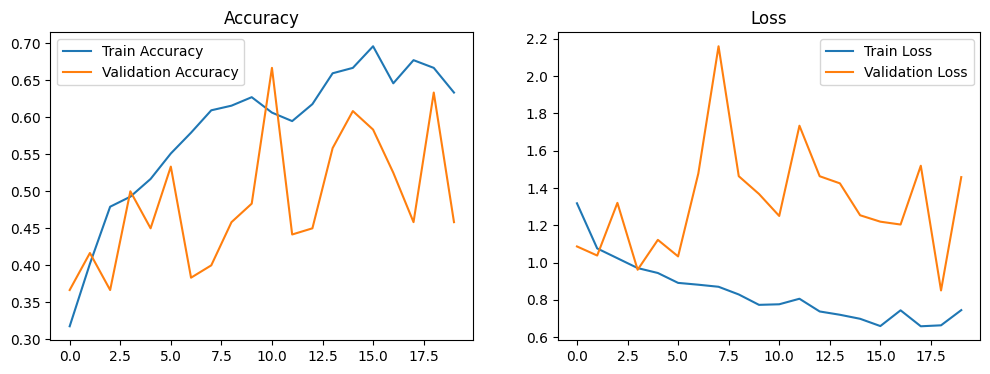

In [16]:
# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [17]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Akurasi Training: {final_train_acc:.4f}")
print(f"Akurasi Validation: {final_val_acc:.4f}")


Akurasi Training: 0.6333
Akurasi Validation: 0.4583


In [18]:
import pickle

# Simpan history ke file
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model
model.save("cnn_tanah_gambut.h5")


In [19]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)  # Baca gambar
    image = cv2.resize(image, target_size)  # Resize ke 224x224
    image = img_to_array(image) / 255.0  # Normalisasi ke [0,1]
    return image

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotasi lebih besar
    width_shift_range=0.2,  # Geser horizontal
    height_shift_range=0.2,  # Geser vertikal
    shear_range=0.2,  # Distorsi sudut
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Balik horizontal
    vertical_flip=True,  # Balik vertikal (bisa dicoba jika masuk akal)
    fill_mode='nearest'
)

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load pretrained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Tambahkan layer baru
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout lebih besar untuk mengurangi overfitting
x = Dense(3, activation='softmax')(x)  # 3 kelas (fibrik, hemik, saprik)

model = Model(inputs=base_model.input, outputs=x)

# Freeze layer awal
for layer in base_model.layers:
    layer.trainable = False


In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
import os
print(os.path.exists("C:/xampp/htdocs/tanahgambut/training"))

True


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
valid_generator = test_datagen.flow_from_directory(
    'C:/xampp/htdocs/tanahgambut/validasi',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 3 classes.


In [31]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced',
                                     classes=np.unique(train_generator.classes),
                                     y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

model.fit(train_generator, 
          validation_data=valid_generator, 
          epochs=20, 
          class_weight=class_weights)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3789 - loss: 1.3523

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.3803 - loss: 1.3495 - val_accuracy: 0.6833 - val_loss: 0.7592
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5092 - loss: 1.0163 - val_accuracy: 0.7250 - val_loss: 0.6941
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6093 - loss: 0.8568 - val_accuracy: 0.7083 - val_loss: 0.6794
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6505 - loss: 0.7681 - val_accuracy: 0.7333 - val_loss: 0.6412
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6595 - loss: 0.7217 - val_accuracy: 0.7167 - val_loss: 0.6330
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7000 - loss: 0.6739 - val_accuracy: 0.7333 - val_loss: 0.6380
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7207 - loss: 0.6326 - val_accuracy: 0.7417 - val_loss: 0.6025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7205 - loss: 0.6554 - val_accuracy: 0.7667 - val_loss: 0.5976
Epo

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

model.fit(train_generator, 
          validation_data=valid_generator, 
          epochs=50,  # Tambah jumlah epoch
          callbacks=[early_stopping, reduce_lr])


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8075 - loss: 0.4539 - val_accuracy: 0.7917 - val_loss: 0.5495 - learning_rate: 2.0000e-05
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8260 - loss: 0.4378 - val_accuracy: 0.8000 - val_loss: 0.5542 - learning_rate: 2.0000e-05
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8243 - loss: 0.4441 - val_accuracy: 0.7667 - val_loss: 0.5493 - learning_rate: 2.0000e-05
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8043 - loss: 0.4685 - val_accuracy: 0.8000 - val_loss: 0.5260 - learning_rate: 2.0000e-05
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7928 - loss: 0.4875 - val_accuracy: 0.7833 - val_loss: 0.5497 - learning_rate: 2.0000e-05
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7951 - loss: 0.4818 - val_accuracy: 0.7917 - val_loss: 0.5343 - learning_rate: 2.0000e-05
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8269 - loss:

Found 240 images belonging to 3 classes.


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 679ms/step - accuracy: 0.8039 - loss: 0.4109
Test Accuracy: 0.7917
Test Loss: 0.5235


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 866ms/step
Classification Report:
              precision    recall  f1-score   support

      fibrik       0.71      0.88      0.79        80
       hemik       0.97      0.72      0.83        80
      saprik       0.76      0.78      0.77        80

    accuracy                           0.79       240
   macro avg       0.81      0.79      0.79       240
weighted avg       0.81      0.79      0.79       240



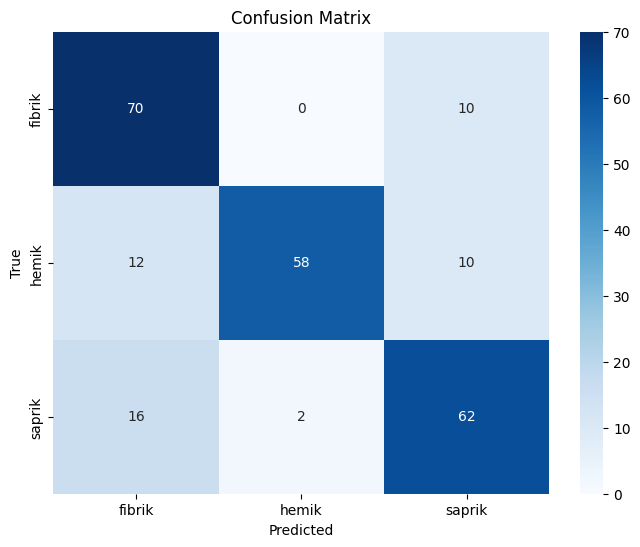

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Menyiapkan ImageDataGenerator untuk data testing
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi citra
test_directory = "C:/xampp/htdocs/tanahgambut/validasi"  # Ganti dengan direktori testing yang sesuai

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Agar urutan tidak tercampur
)

# Evaluasi model menggunakan dataset testing
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Prediksi menggunakan model untuk data testing
y_true = test_generator.classes
y_pred = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices))

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 683ms/step - accuracy: 0.8039 - loss: 0.4109
Test Accuracy: 0.7917
Test Loss: 0.5235
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step
Classification Report:
              precision    recall  f1-score   support

      fibrik       0.71      0.88      0.79        80
       hemik       0.97      0.72      0.83        80
      saprik       0.76      0.78      0.77        80

    accuracy                           0.79       240
   macro avg       0.81      0.79      0.79       240
weighted avg       0.81      0.79      0.79       240



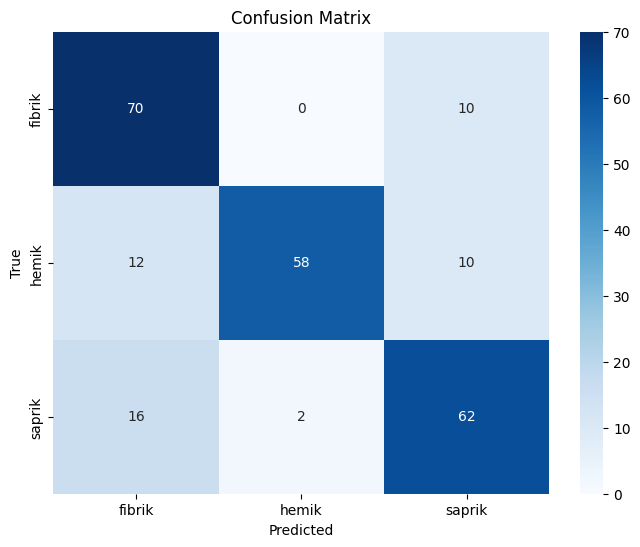

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi model menggunakan dataset testing
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Prediksi menggunakan model untuk data testing
y_true = test_generator.classes
y_pred = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices))

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8214 - loss: 0.4483 - val_accuracy: 0.8080 - val_loss: 0.5259
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8293 - loss: 0.4540 - val_accuracy: 0.7946 - val_loss: 0.5290
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8185 - loss: 0.4390 - val_accuracy: 0.7902 - val_loss: 0.5394
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8430 - loss: 0.4182 - val_accuracy: 0.7857 - val_loss: 0.5315
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7984 - loss: 0.4562 - val_accuracy: 0.7902 - val_loss: 0.5138
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7855 - loss: 0.4881 - val_accuracy: 0.7946 - val_loss: 0.5205
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8359 - loss: 0.4121 - val_accuracy: 0.7857 - val_loss: 0.5281
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8131 - loss: 0.4521 - val_accuracy: 0.7857 - val_loss:

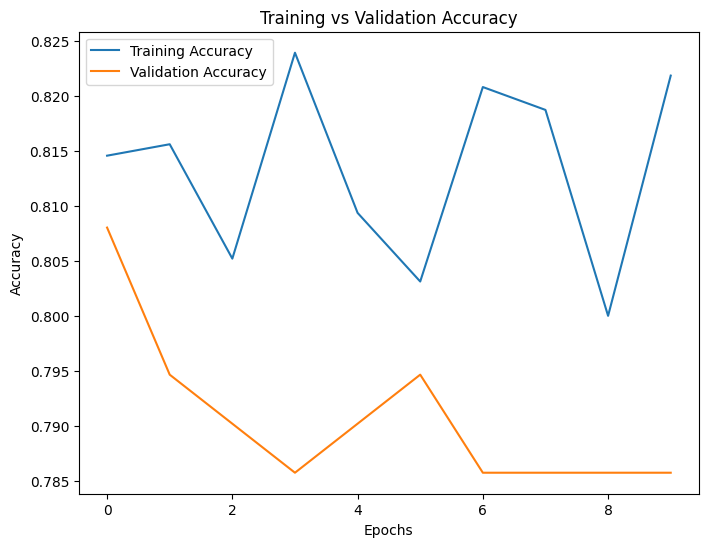

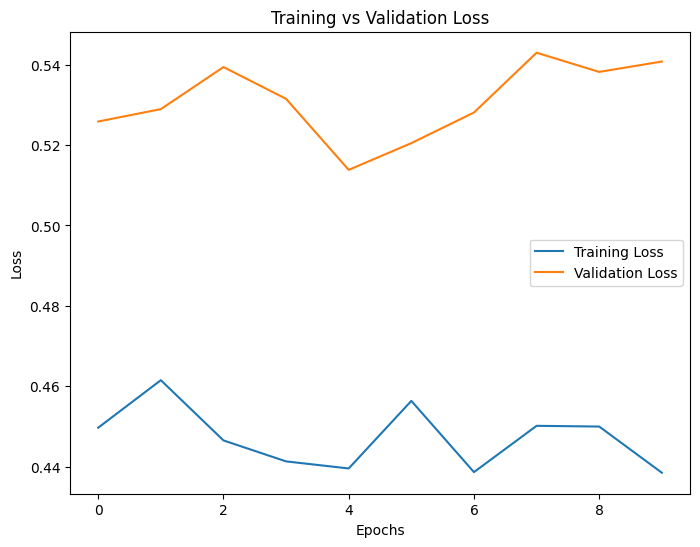

In [38]:
# Mengambil history training
history = model.history.history

# Visualisasi Training vs Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Visualisasi Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# Confusion Matrix sudah ditampilkan di atas


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator untuk training
train_data = train_datagen.flow_from_directory(
    r'C:\xampp\htdocs\tanahgambut\training',  # Sesuaikan dengan direktori dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Data generator untuk validasi
val_datagen = ImageDataGenerator(rescale=1./255)

val_data = val_datagen.flow_from_directory(
    r'C:\xampp\htdocs\tanahgambut\validasi',  # Sesuaikan dengan direktori dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 960 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [42]:
# Menampilkan nilai akurasi dan validasi terakhir
history = model.fit(train_data, validation_data=val_data, epochs=10)

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f'Final Training Accuracy: {final_train_acc:.4f}')
print(f'Final Validation Accuracy: {final_val_acc:.4f}')

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8297 - loss: 0.4415 - val_accuracy: 0.7917 - val_loss: 0.5230
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8258 - loss: 0.4473 - val_accuracy: 0.7917 - val_loss: 0.5224
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7997 - loss: 0.4564 - val_accuracy: 0.7917 - val_loss: 0.5246
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8278 - loss: 0.4287 - val_accuracy: 0.7917 - val_loss: 0.5237
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8029 - loss: 0.4595 - val_accuracy: 0.7917 - val_loss: 0.5193
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8512 - loss: 0.4117 - val_accuracy: 0.7917 - val_loss: 0.5229
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8115 - loss: 0.4454 - val_accuracy: 0.7917 - val_loss: 0.5255
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8310 - loss: 0.4576 - val_accuracy: 0.8000 - val_loss:

In [43]:
import pickle

# Simpan history ke file
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model
model.save("cnn_tanah_gambut.h5")